NOTE for the instructor: magnitude, flux, distance modulus, calibration

# This notebook is intended to show how to calibrate an image

let's start using the magic function we learned last time "%pylab inline"
<br> then we can import the packages we will use today: sep, astropy  
<br> from astropy we will import: fits and wcs

In [1]:
%pylab inline
from astropy.io import fits
from astropy import wcs as wcs
import sep

Populating the interactive namespace from numpy and matplotlib


# read an image
 <font color='blue'> let's read an image as we learned in previous lectures
and let's define the data and the header </font>

In [2]:
img = fits.open('16335757.fits')
X = img[0].data
header= img[0].header

let's do an instogram and see where al the data are

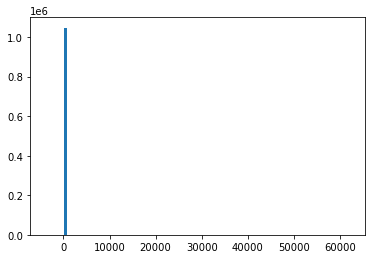

In [3]:
image_hist = plt.hist(X.flatten(), bins=100)

let do it again constraining the range of the histogram  <font color='blue'> using range=(X,Y) </font>

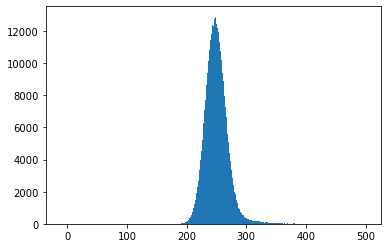

In [4]:
image_hist = plt.hist(X.flatten(), bins=1000,range=(-10,500))

let's now do the plot using some limits. what do yo think we should use?  vmin=-XX, vmax=YY)

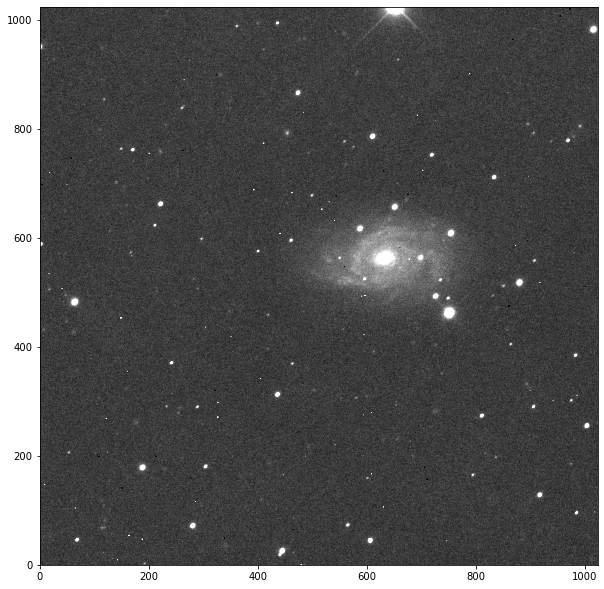

In [5]:
plt.figure(figsize=(10,12))
imgshow = plt.imshow(X, origin='lower', cmap='gray', vmin=200, vmax=400)

Now we would like to be able to find the position of all stars in the image. We use the package <font color='red'>sep</font> that discovered last lecture, we need to define the background of the image. 
The 3 command we need to use are the following:
<br> <font color='blue'>  X = X.byteswap().newbyteorder()</font>
<br> <font color='blue'>  bkg = sep.Background(X)</font>
<br> <font color='blue'>  objects = sep.extract(X, thresh=20.0, err=bkg.globalrms, mask=None, minarea=10, clean=True, clean_param=1.0, segmentation_map=False)</font>

In [6]:
X = img[0].data
X = X.byteswap().newbyteorder()
bkg = sep.Background(X)
data_sub = X - bkg
objects = sep.extract(X, thresh=20.0, err=bkg.globalrms, mask=None, minarea=10, clean=True, clean_param=1.0, segmentation_map=False)

objects is a NumPy structured array with many fields. We have seen the previous lecture where the source detections are stored. <br> <font color='blue'> plot the extracted object on the image </font>

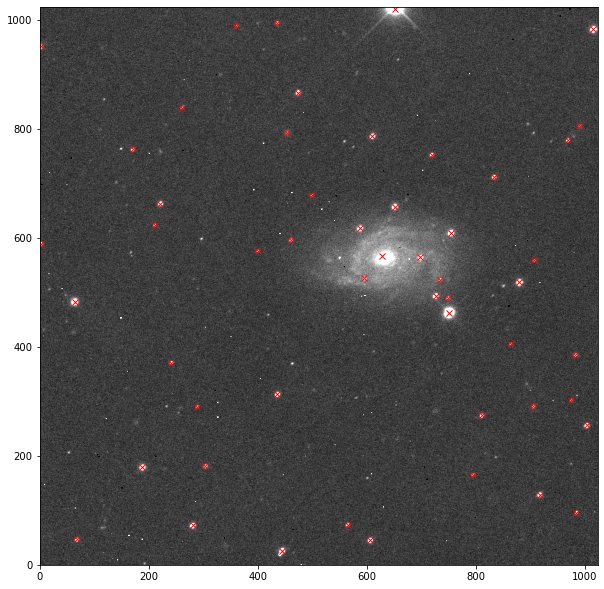

In [7]:
plt.figure(figsize=(10,12))
imgshow = plt.imshow(X, origin='lower', cmap='gray', vmin=200, vmax=400)
plt.plot(objects['x'],objects['y'],'xr')

# photometry, flux
Now what we want to do with these objects? We probably want to measure how much light is emitted by each of them
Let zoom on one of them. let's cut a small matrix of 40 x 40 pixels with one object in the center. to cut a region we should do  <font color='blue'> X[a:b,c:d] </font> with a,b,c,d the pixels (integer) at the edges of the small matrix. <br> <font color='blue'> let's do that for the element 10 of the object dictionary. object['x'][10] and object['y'][10] 
</font>
<br> <font color='blue'> let's now plot the smal image</font>

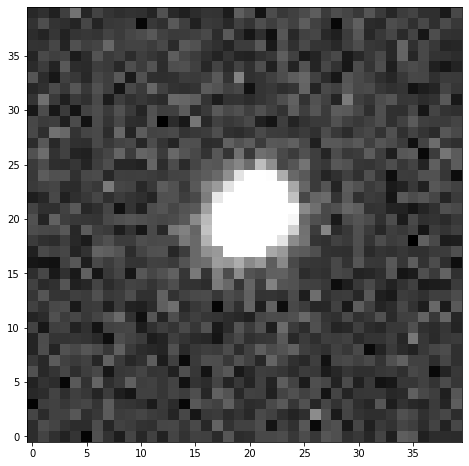

In [8]:
x1 = X[int(objects['y'][10])-20:int(objects['y'][10])+20,int(objects['x'][10])-20:int(objects['x'][10])+20] 

fig, ax = plt.subplots(ncols=1, figsize=(8, 8))
imgshow = ax.imshow(x1, origin='lower', cmap='gray', vmin=200, vmax=400)

let's select the region to get al the counts of the object. We can use a circle.
<br> <font color='blue'> How large should be the radius?</font>
The command to select the circle is 
<br> <font color='blue'> circ = Circle((?,?),? ,color='r', lw=4, fill=False) </font>
<br> <font color='blue'> ax.add_patch(circ) </font>

40


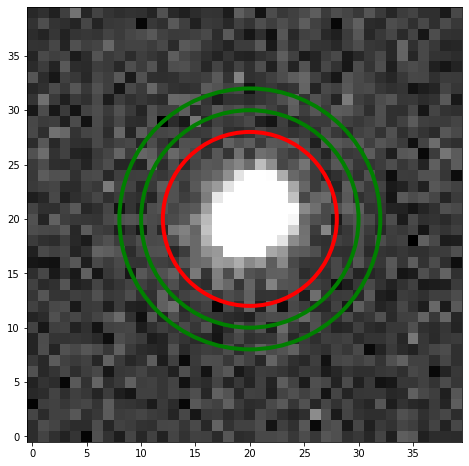

In [9]:
print(len(x1))
fig, ax = plt.subplots(ncols=1, figsize=(8, 8))
imgshow = ax.imshow(x1, origin='lower', cmap='gray', vmin=200, vmax=400)
circ = Circle((20,20),8 ,color='r', lw=4, fill=False)
ring1 = Circle((20,20),10 ,color='g',lw=4, fill=False)
ring2 = Circle((20,20),12 ,color='g',lw=4, fill=False)
ax.add_patch(circ)
ax.add_patch(ring1)
ax.add_patch(ring2)

Now to measure the flux we will use the sep command:
<br> <font color='blue'> flux, fluxerr, flag = sep.sum_circle(X, [objects['x'][10]], [objects['y'][10]], ???, err=bkg.globalrms, gain=1.0) </font> Chose the correct value of the circle to include all the flux of the object.  
<br> <font color='blue'> try different radius and check the difference. for example 1,2,3,5,7,10, 15,20</font>                 

[9274.22182617] [100.29607035]
[25655.21814941] [169.69247997]
[36644.49107788] [209.14207033]
[41783.48011902] [233.29226214]
[44121.7822644] [252.7242793]
[45339.14668213] [271.61209532]
[46190.57052673] [291.34330014]
[46598.22054626] [311.74596808]
[46775.42459778] [332.89612104]
[47091.98190247] [355.19518472]
[47350.95227539] [378.21975007]
[47523.53475403] [401.72160864]
[47805.33986145] [425.93415003]
[48096.16854309] [450.59819447]
[47990.10610718] [475.25897651]
[47932.75177551] [500.31216198]
[47908.28798401] [525.64831285]
[47974.36943115] [551.41762259]
[48096.77147095] [577.40176217]


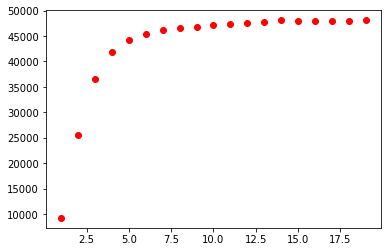

In [10]:
fluxvec = []
radiuscev = []
for radius in range(1,20):
    flux, fluxerr, flag = sep.sum_circle(data_sub, [objects['x'][10]], [objects['y'][10]],
                                         radius, err=bkg.globalrms, gain=1.0)
    print(flux,fluxerr)
    fluxvec.append(flux)
    radiuscev.append(radius)
#print(objects['x'], objects['y'])
plt.plot(radiuscev,fluxvec,'or')

<br> <font color='blue'> any idea what is going on here? try to explain </font>

What we have just measured is the counts within a radius of ?? pixel for one object we selected in the image. How we use this measurments in astronomy? we usually convert this measurment in magnitude and if we know how our telescope is performing, we know how bright a star appear to be. How bright actually is depends on how far the star is. 
<br> <font color='blue'> Let's first convert the flux in magnitudes. </font> 

In [14]:
flux, fluxerr, flag = sep.sum_circle(data_sub, [objects['x'][10]], [objects['y'][10]],
                                         10, err=bkg.globalrms, gain=1.0)
print(flux)
instrumental_magnitude = -2.5 *np.log10(flux[0])
print('instrumental magnitude ', instrumental_magnitude)

[47091.98190247]
instrumental magnitude  -11.682367421115941


Now we need to know how the telescope performed that night to transform the insturmental magnitude to the apparent magnitude of the object. Now, to do that <br> <font color='blue'> we need to know the apparent magnitude of one object in this image, measure the instrumental magnitude for that object and the difference apparent magnitude - instrumental magnitude will tell us the Zero point of the image (the calibration of the image). 
<br> <font color='blue'> Let's say that object[9] of the list has an apparent magnitude of 15, can you compute the zeropoint of the image? </font>

In [15]:
# instrumental magnitude for object[9]
flux9, fluxerr9, flag9 = sep.sum_circle(data_sub, [objects['x'][9]], [objects['y'][9]],
                                         10, err=bkg.globalrms, gain=1.0)
instrumental_magnitude9 = -2.5 *np.log10(flux9[0])
apparent_magnitude9 = 15 
zero_point = apparent_magnitude9 - instrumental_magnitude9
print('zero point of the image', zero_point)

zero point of the image 25.38090805363596


<br> <font color='blue'> Now that you have the zero point of the image, can you copute the apparent magnitude of object 10? <font>

In [16]:
apparent_magnitude10 = instrumental_magnitude + zero_point
print(apparent_magnitude10)

13.698540632520018
